<a href="https://colab.research.google.com/github/swostikabasnet/Drug-Classification/blob/main/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 111.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="c6oMki1EmHUmA3QDNe4s")
project = rf.workspace("detection-pplei").project("pothole-detection-nqake")
version = project.version(1)
dataset = version.download("yolov8")

print("Dataset downloaded to:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-Detection-1 in yolov8:: 100%|██████████| 1446/1446 [00:00<00:00, 6114.07it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded to: /content/Pothole-Detection-1


**Training our custom model**

**Loading the dataset(downloaded from roboflow)**

In [7]:
dataset_path = "/content/Pothole-Detection-1"
data_yaml = f"{dataset_path}/data.yaml"

In [8]:
# Training the YOLOv8 model
from ultralytics import YOLO
model = YOLO("yolov8s.pt")  # loading the  pretrained YOLOv8 small model
model.train(
    data=data_yaml,
    epochs=20,
    imgsz=416,
    batch=8,
    name="pothole_yolov8_custom"
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolov8_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fa021bddc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

**Checking available files in the dataset**

In [9]:
!ls /content/runs/detect/pothole_yolov8_custom

args.yaml			 results.csv	     val_batch0_labels.jpg
BoxF1_curve.png			 results.png	     val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch630.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch631.jpg  weights
labels.jpg			 train_batch632.jpg


**Display diff charts(training outputs) that YOLO automaticlly creates (confusion matrix,charts..)**

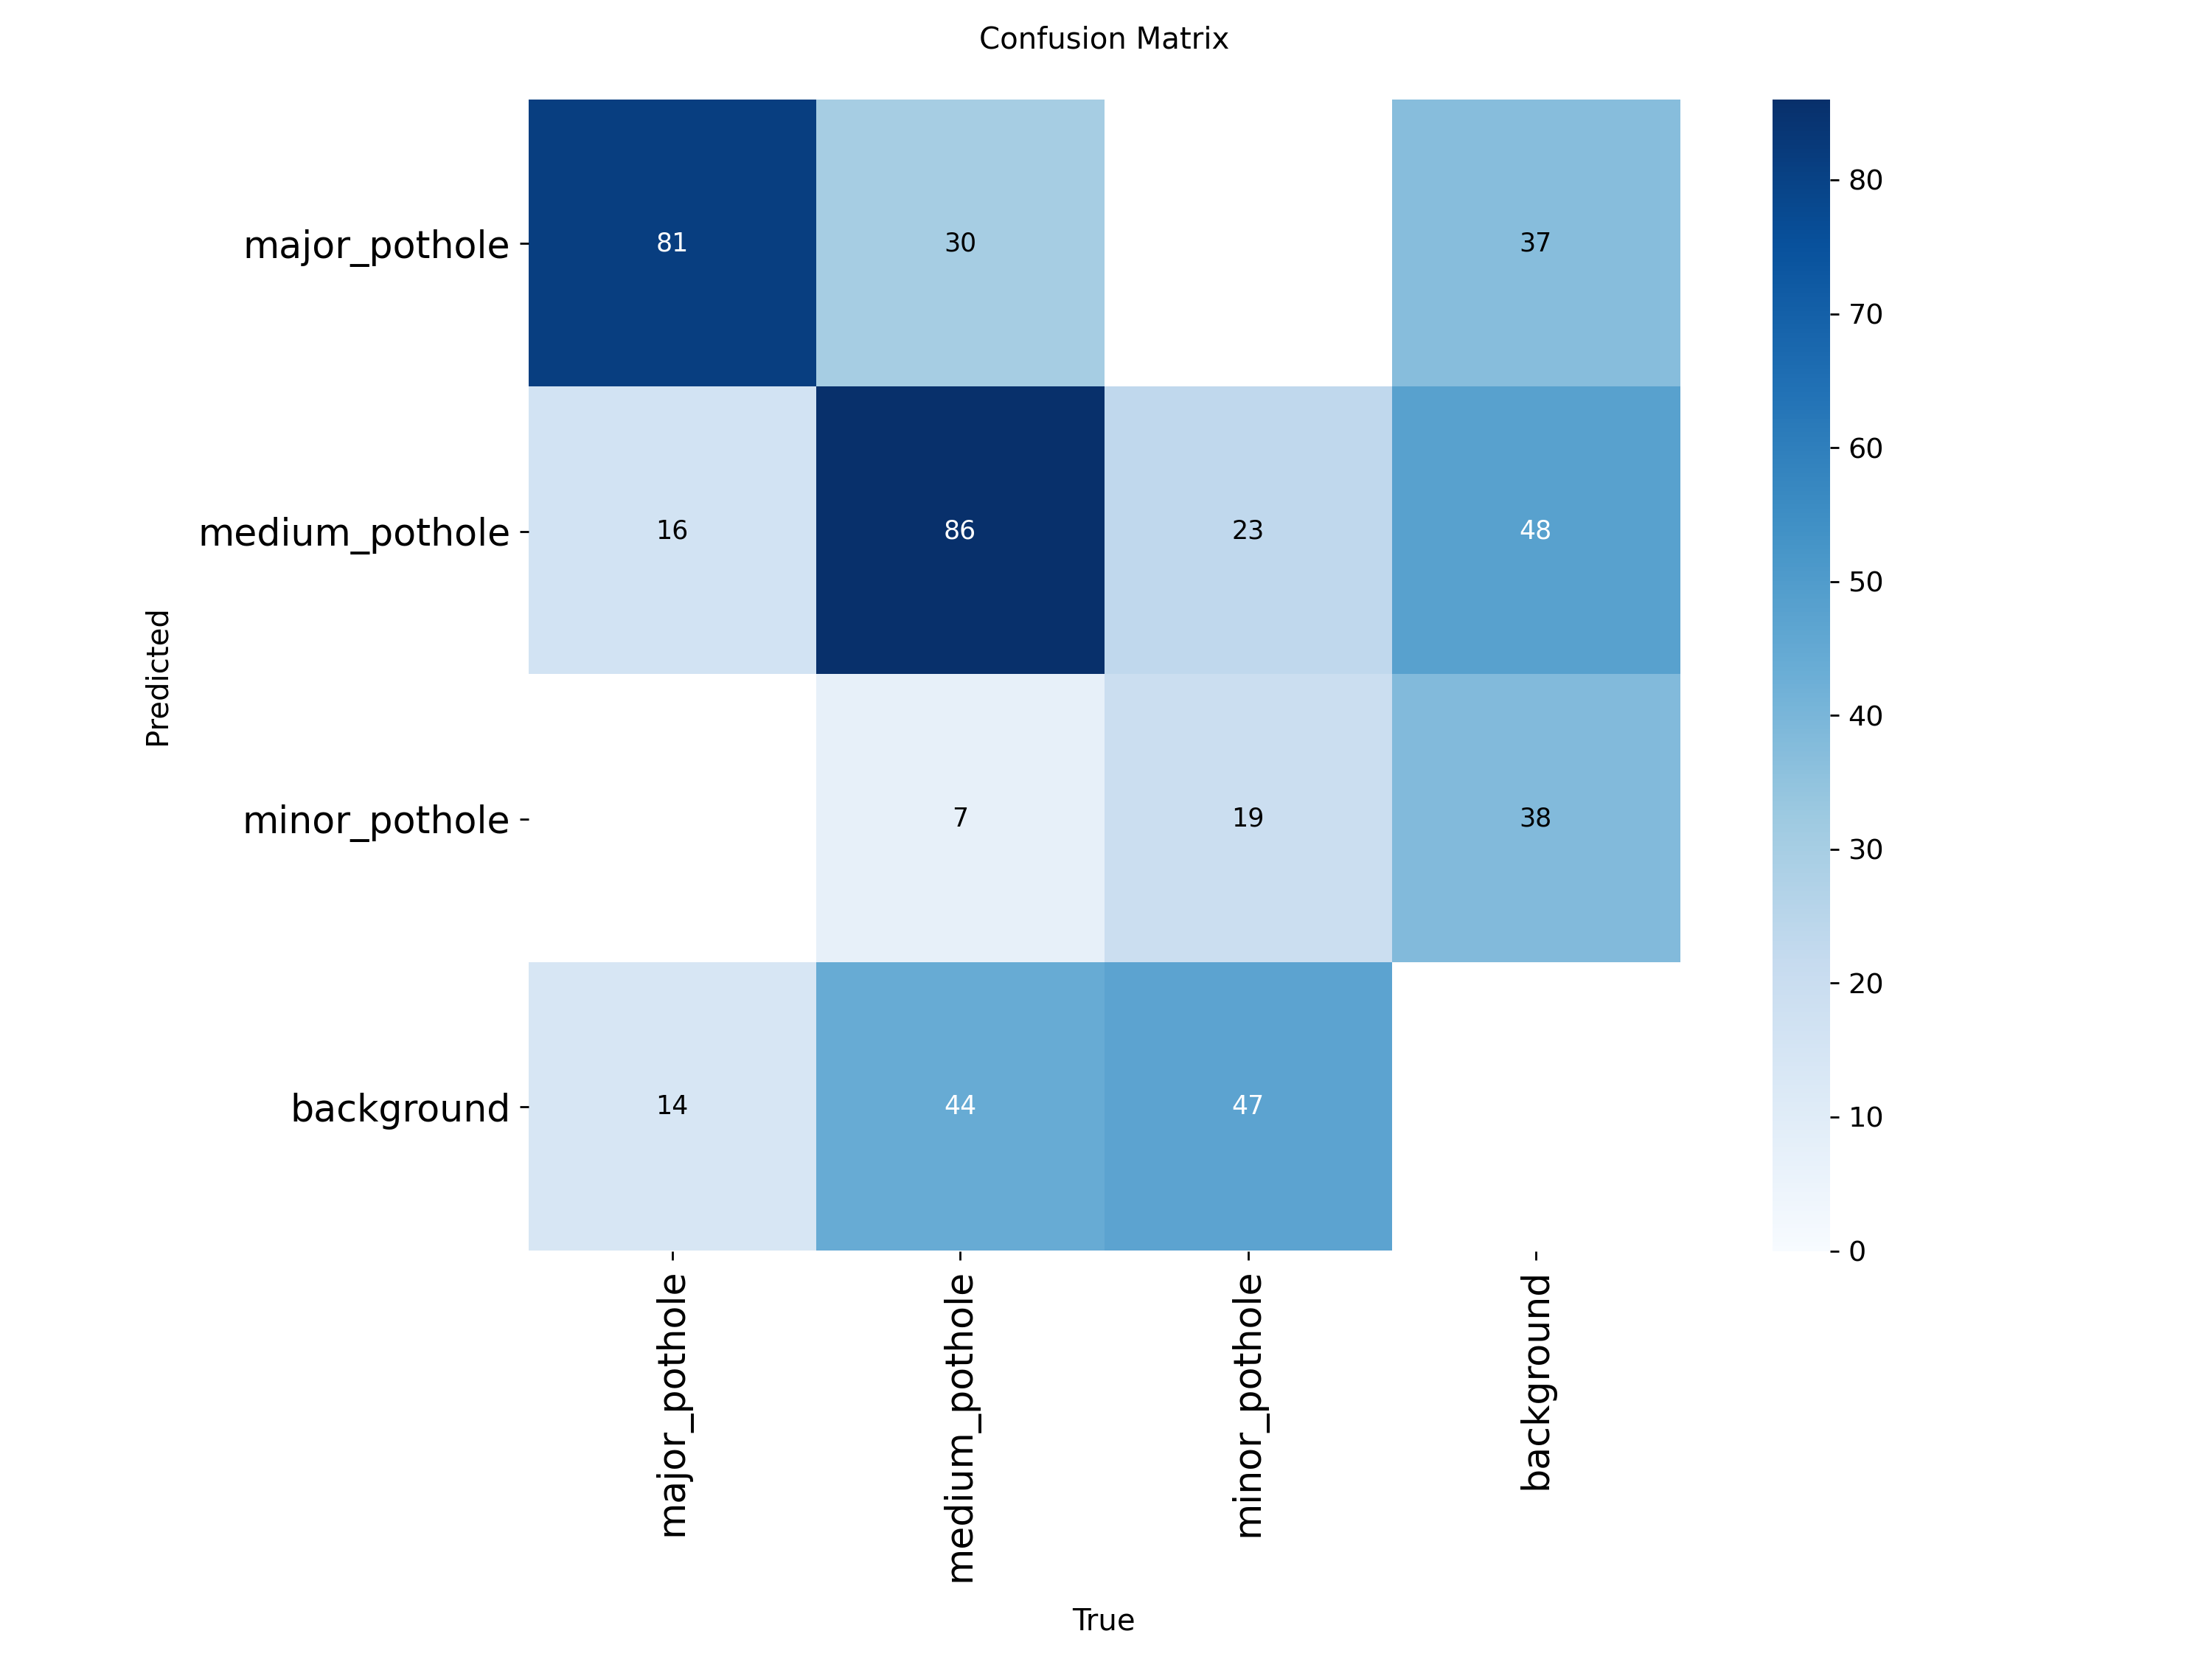

In [10]:
from IPython.display import Image
Image("/content/runs/detect/pothole_yolov8_custom/confusion_matrix.png",width=600)

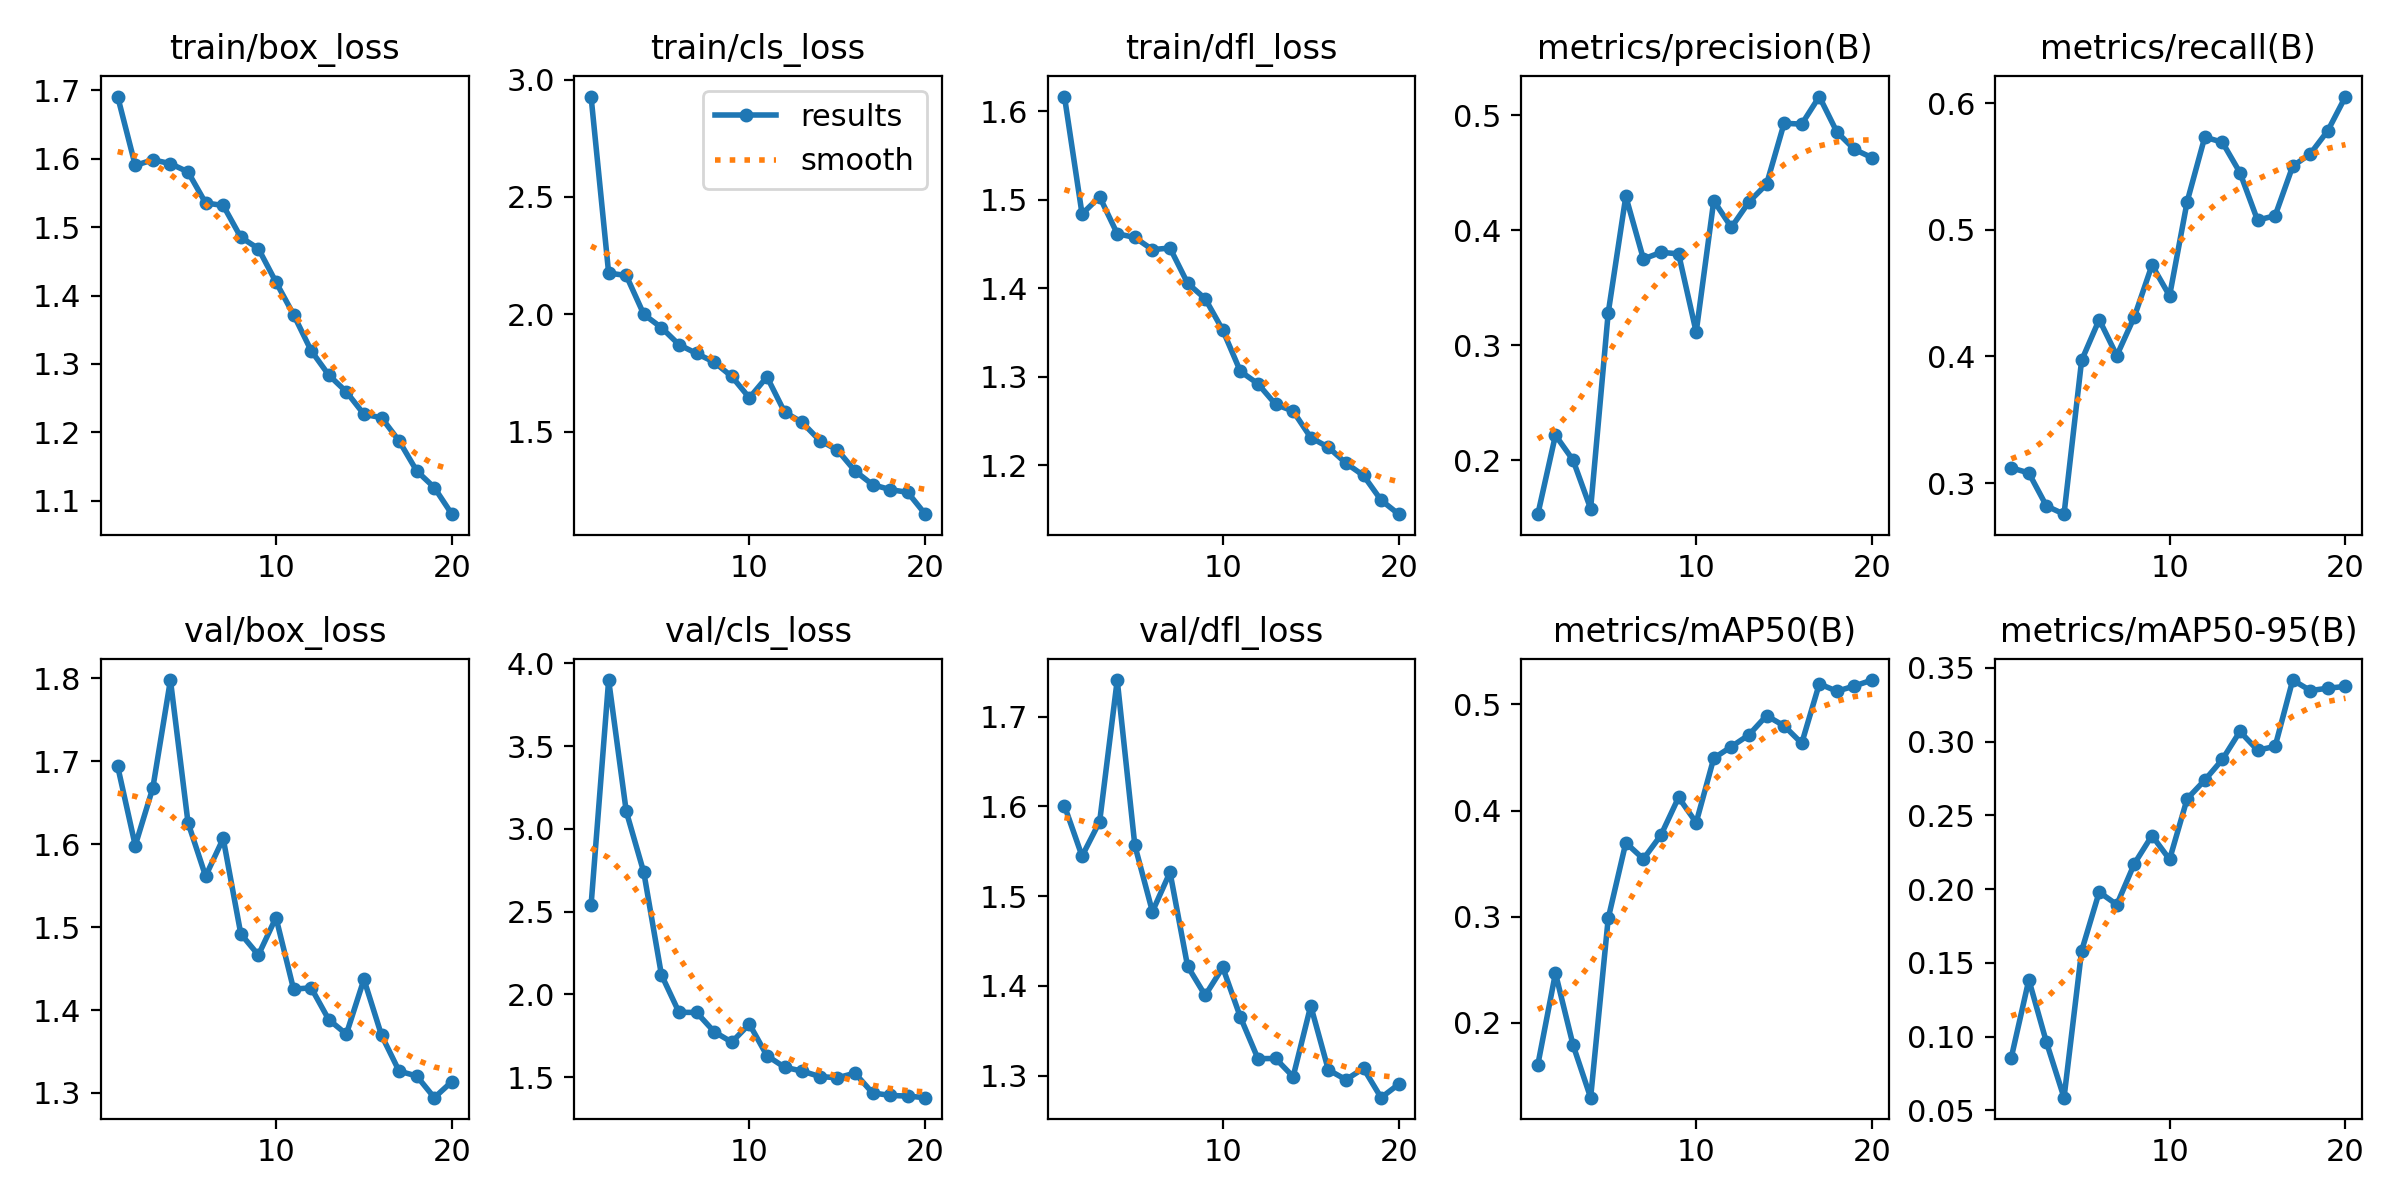

In [12]:
# Loss/metrics graph
Image("/content/runs/detect/pothole_yolov8_custom/results.png",width=600)

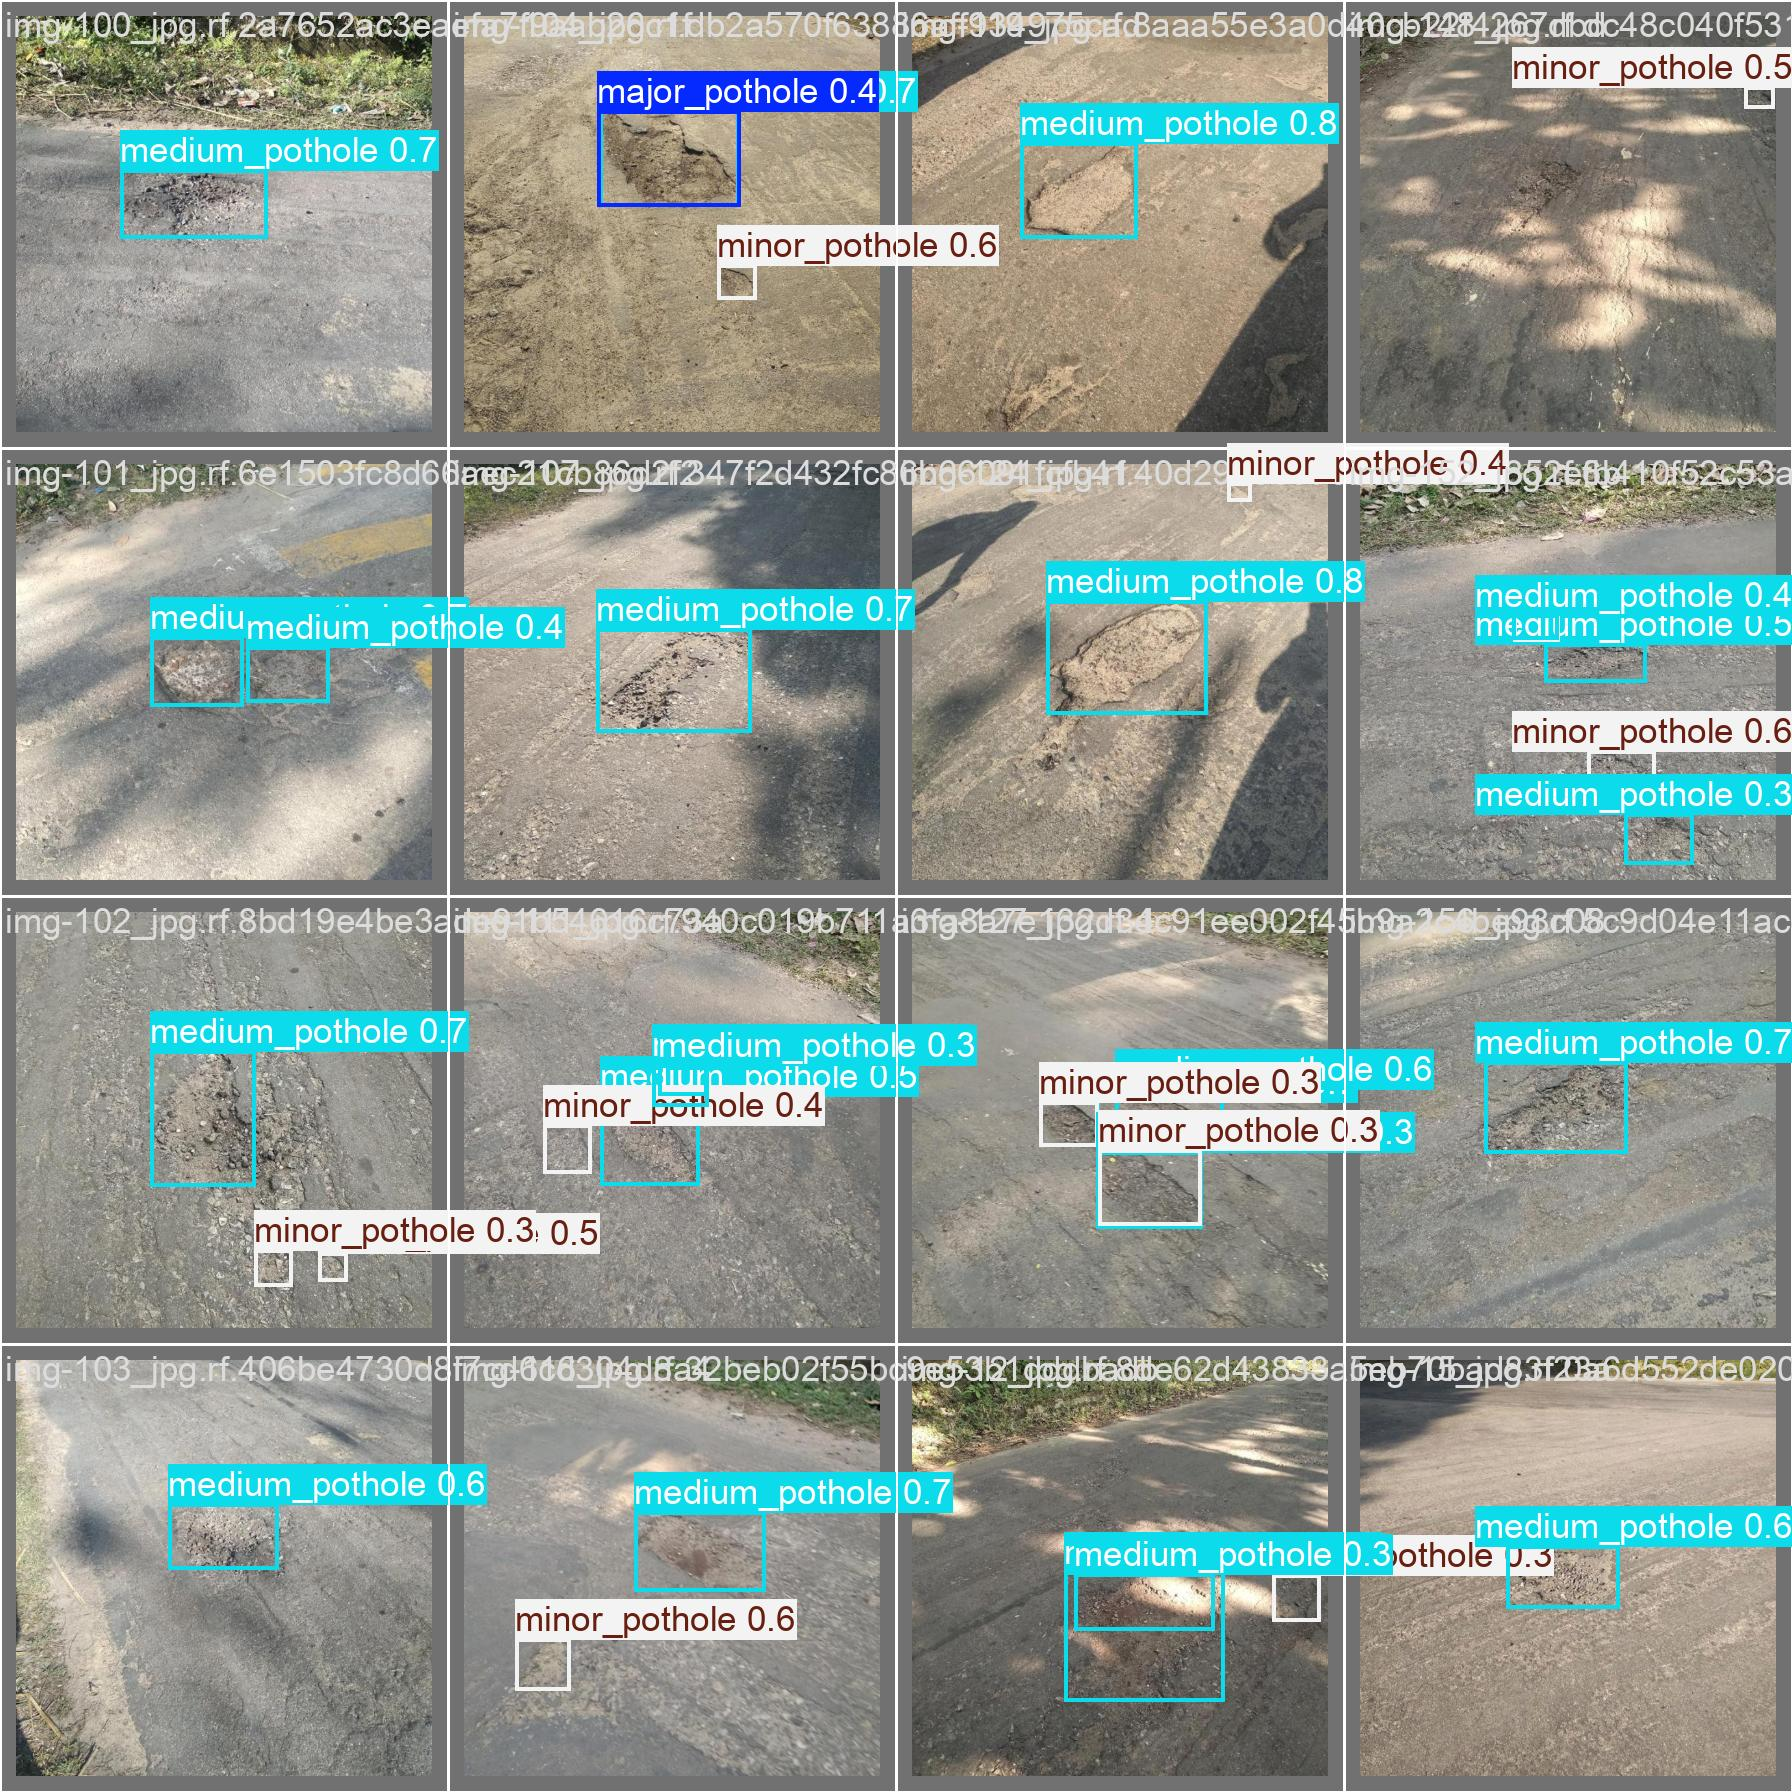

In [13]:
Image("/content/runs/detect/pothole_yolov8_custom/val_batch0_pred.jpg",width=600)

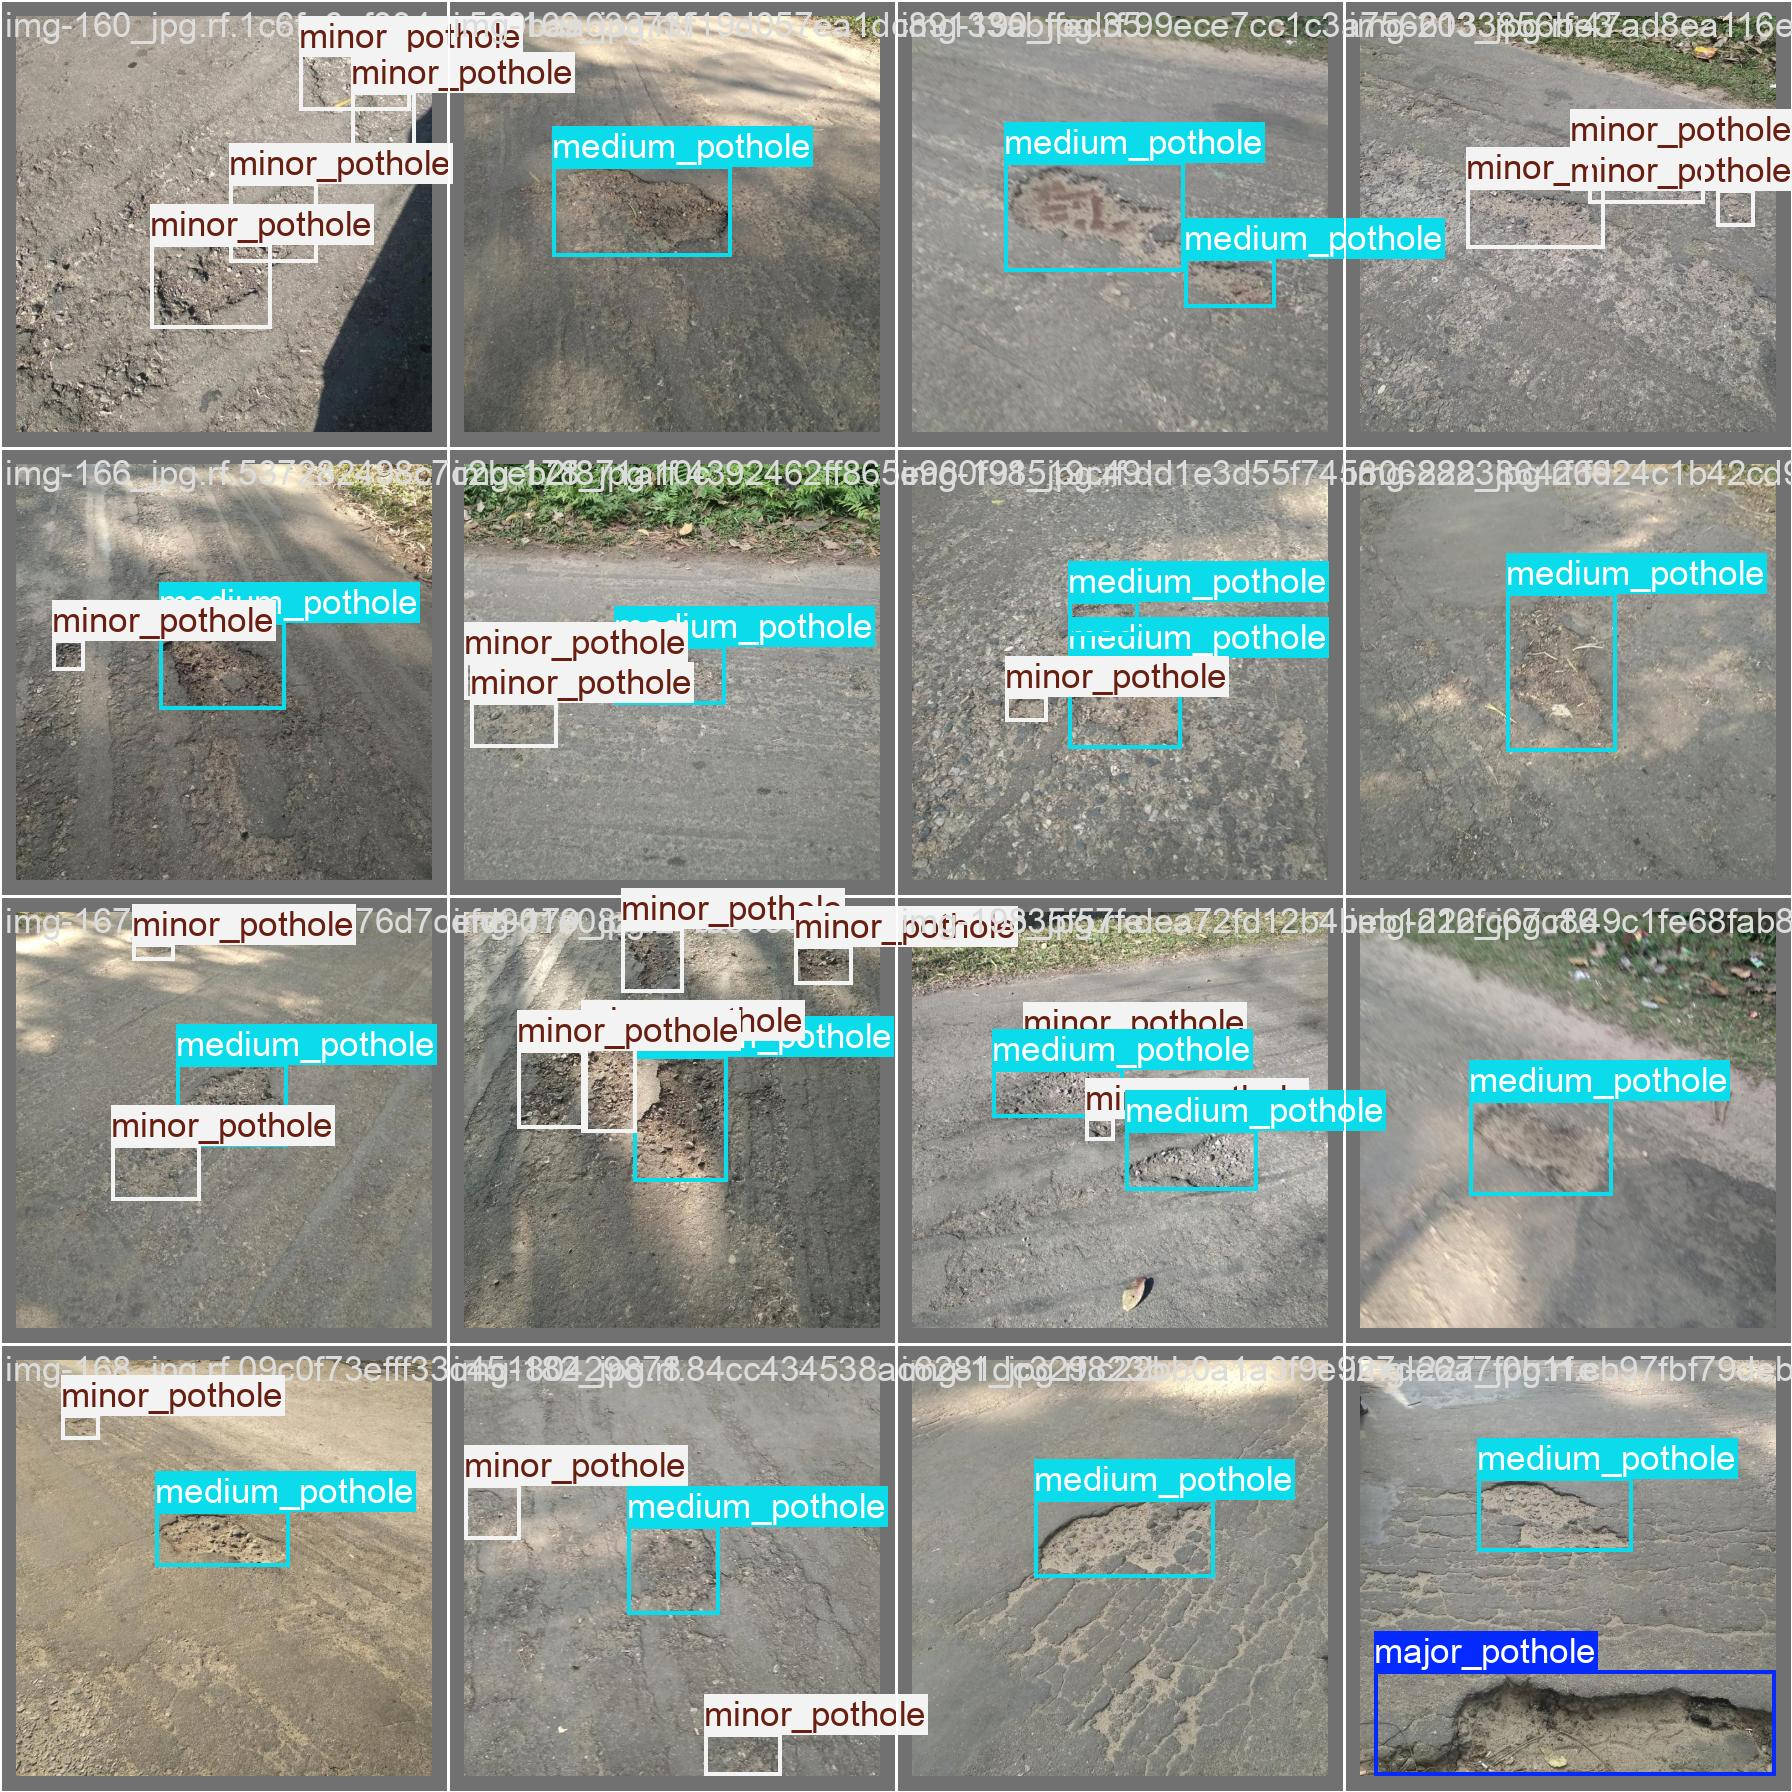

In [14]:
Image("/content/runs/detect/pothole_yolov8_custom/val_batch1_labels.jpg",width=600)

**Inference with custom model** = testing custom trained model on new data.

using the trained (custom) model to make predictions on new images or videos-> basically “asking the model to detect potholes” on data it hasn’t seen during training

Saving img-473.jpg to img-473.jpg

image 1/1 /content/img-473.jpg: 416x416 1 major_pothole, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


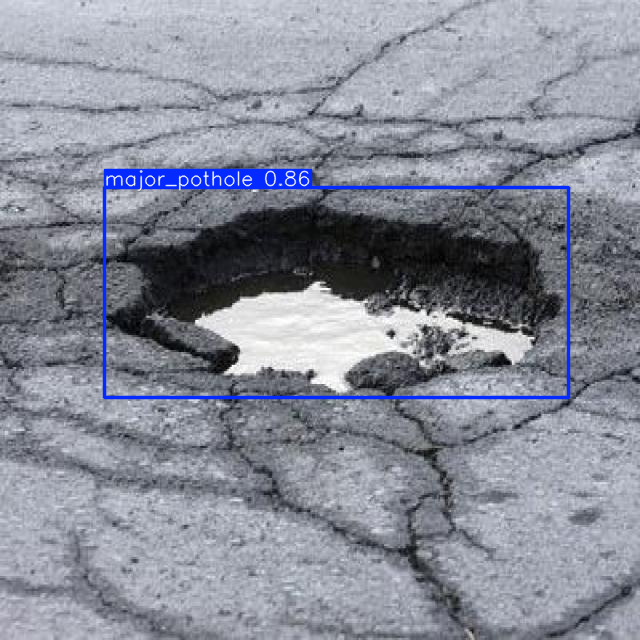

In [24]:
from google.colab import files
uploaded = files.upload()  # uploading our test image manually
image_path = list(uploaded.keys())[0]

results = model.predict(source=f"/content/{image_path}", conf=0.4)
for r in results:
    r.show()